In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast
# Load the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = (df['job_skills']
                    .apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else [])
                    )

Text(0, 0.5, '')

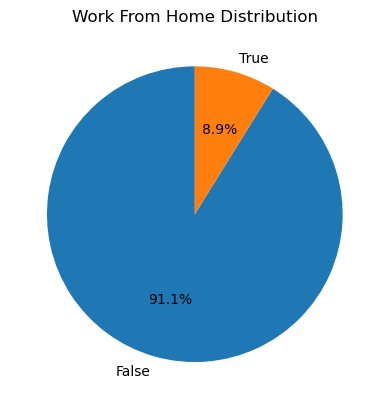

In [7]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('Work From Home Distribution')
plt.ylabel('')

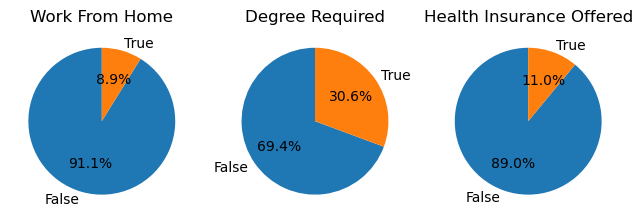

In [13]:
fig, ax = plt.subplots(1,3)

dict_charts={
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention' : 'Degree Required',
    'job_health_insurance' : 'Health Insurance Offered'
}

for i,(col,title) in enumerate(dict_charts.items()):
    ax[i].pie(df[col].value_counts(), startangle=90, autopct='%1.1f%%', labels=df[col].value_counts().index)
    ax[i].set_title(title)
plt.tight_layout()
plt.show()